The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

QUESTIONS

1) What is the most commonly awarded gender and birth country?
2) Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
3) Which decade and Nobel Prize category combination had the highest proportion of female laureates?
4) Who was the first woman to receive a Nobel Prize, and in what category?
5) Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!

In [2]:
# Cargamos el dataset desde el folder llamado data.
nobel = pd.read_csv('C:\\Users\\ASUS\\Desktop\\Data_Science\\DataCamp\\Associate_data_scientist_in_Python\\Projects\\10_Visualizing_the_history_of_Nobel_prize_winners\\nobel.csv')
nobel

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Contamos los diez paises que tienen más personas galardonadas.
country = nobel['birth_country'].value_counts(sort=True)
country_df=country.to_frame()
country_filt=country_df.iloc[:10]
country_filt=country_filt.reset_index()
country_filt=country_filt.rename(columns={'birth_country':'country','count':'num_total'})
country_filt

,country,num_total
0,United States of America,291
1,United Kingdom,91
2,Germany,67
3,France,58
4,Sweden,30
5,Japan,28
6,Canada,21
7,Netherlands,19
8,Switzerland,19
9,Italy,18


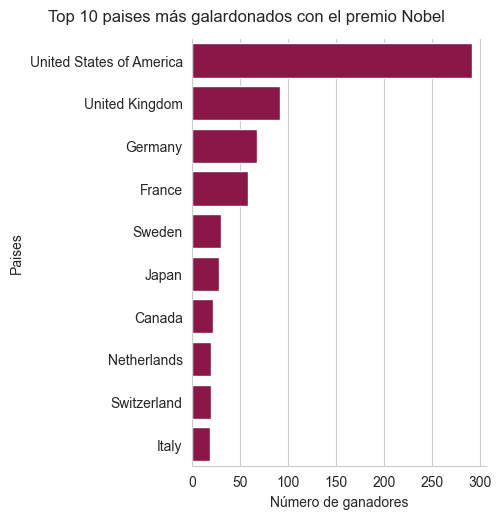

In [9]:
# Gráficamos los diez paises que tienen más personas galardonadas.
sns.set_palette('PuRd_r')
sns.set_style('whitegrid')
g=sns.catplot(y='country', x='num_total', data=country_filt, kind='bar')
g.fig.suptitle('Top 10 paises más galardonados con el premio Nobel', y=1.03)
g.set(xlabel='Número de ganadores', ylabel='Paises')
plt.show()

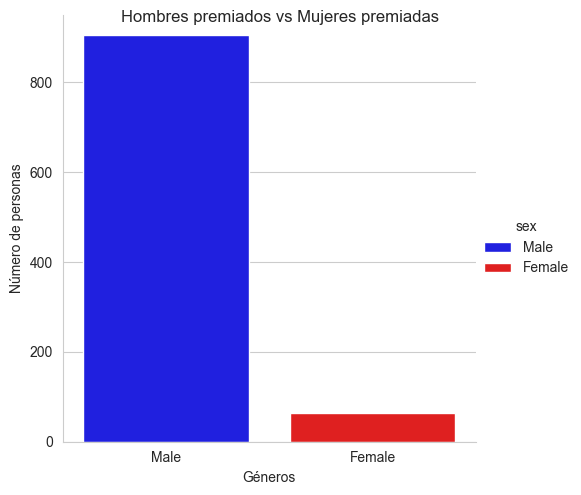

In [10]:
# Gráficamos la comparación entre el número total de hombres y mujeres premiadas.
sns.set_palette(['b','r'])
g=sns.catplot(x='sex', data=nobel, kind='count', hue='sex')
g.fig.suptitle('Hombres premiados vs Mujeres premiadas')
g.set(xlabel='Géneros', ylabel='Número de personas')
plt.show()

In [11]:
# Seleccionamos solo las columnas que nos interesan de ahora en adelante y además creamos un subconjunto para los premiados específicos de Estados Unidos.
nobel = nobel[['year', 'category', 'sex', 'birth_country', 'full_name', 'organization_name']]

usa = nobel[nobel['birth_country']=='United States of America']
usa = usa[['year', 'category', 'sex']]

In [12]:
# Creamos una función para crear la nueva columna con las décadas a la que pertenece cada año.
def get_decada(row):
    row = str(row)
    return row[0:3] + "0"
usa["deca"] = usa["year"].apply(get_decada)
nobel['deca'] = nobel['year'].apply(get_decada)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1756\3921229501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel['deca'] = nobel['year'].apply(get_decada)


In [21]:
# Contamos los premiados por cada década y calculamos la proporcion usa/mundo para cada década.
count_nobel = nobel['deca'].value_counts(sort=True)
count_usa = usa['deca'].value_counts(sort=True)

prop = (count_usa / count_nobel) * 100
prop = prop.sort_values(ascending=False)
prop = prop.reset_index()
prop_def = prop.rename(columns={'index':'deca','count':'prop'})
prop_def

,deca,prop
0,2000,42.276423
1,1990,40.384615
2,2020,36.000000
3,1980,31.958763
4,1970,31.730769
5,2010,31.404959
6,1940,30.232558
7,1950,29.166667
8,1960,26.582278
9,1930,25.000000


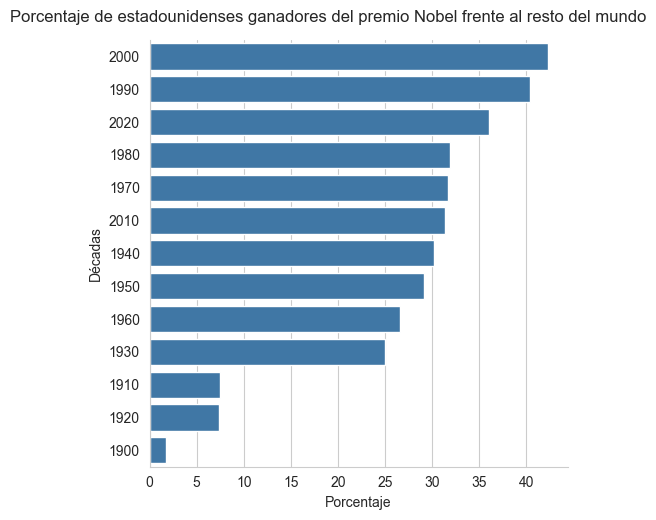

In [22]:
# Graficamos la proporción anterior para cada década.
sns.set_palette('RdBu_r')
sns.set_style('whitegrid')
g=sns.catplot(y='deca', x='prop', data=prop_def, kind='bar')
g.fig.suptitle('Porcentaje de estadounidenses ganadores del premio Nobel frente al resto del mundo',                y=1.03)
g.set(xlabel='Porcentaje', ylabel='Décadas')
plt.show()

In [23]:

# Creamos una columna 'gender' y reemplazamos los dos sexos por ceros (hombres) y unos (mujeres), así podemos agrupar las columnas de 'category' y 'deca' para calcular la media de la columna 'gender', y organizamos de mayor a menor.
nobel['gender'] = nobel['sex'].replace({'Male':0, 'Female':1})
cate_deca = nobel.groupby(['category','deca'])['gender'].mean()
cate_deca = cate_deca.sort_values(ascending=False)
cate_deca

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1756\2853685643.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nobel['gender'] = nobel['sex'].replace({'Male':0, 'Female':1})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1756\2853685643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel['gender'] = nobel['sex'].replace({'Male':0, 'Female':1})


category    deca
Peace       2020    0.5
            2010    0.5
Literature  2020    0.5
Chemistry   2020    0.3
Literature  1990    0.3
                   ... 
Physics     1950    0.0
            1980    0.0
            1970    0.0
            2000    0.0
            1990    0.0
Name: gender, Length: 72, dtype: float64

In [24]:

# Convertimos la serie anterior en un dataframe, además reseteamos el índice y cambiamos el nombre de las columnas 'gender' por 'prop', y finalizamos organizando de menor a mayor la columna 'deca'
cate_deca_df = cate_deca.to_frame()
cate_deca_df = cate_deca_df.reset_index()
cate_deca_df = cate_deca_df.rename(columns={'gender':'prop'})
cate_deca_df = cate_deca_df.sort_values(by='deca')
cate_deca_df

,category,deca,prop
38,Chemistry,1900,0.000000
44,Medicine,1900,0.000000
25,Peace,1900,0.076923
22,Literature,1900,0.100000
27,Physics,1900,0.076923
...,...,...,...
13,Physics,2020,0.166667
17,Medicine,2020,0.125000
21,Economics,2020,0.111111
3,Chemistry,2020,0.300000


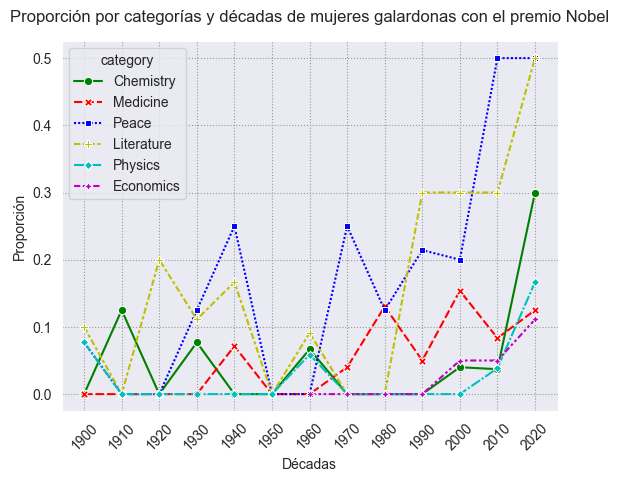

In [25]:
# Graficamos la proporción anterior por década y por categoría.
sns.set_palette(['g', 'r', 'b', 'y', 'c', 'm'])
sns.set_style('darkgrid', {"grid.color": ".6", "grid.linestyle": ":"})
g=sns.lineplot(cate_deca_df,x='deca', y='prop', hue='category', style='category', markers=True)
plt.xticks(rotation=45)
g.set_title('Proporción por categorías y décadas de mujeres galardonas con el premio Nobel', y=1.03)
g.set(xlabel='Décadas', ylabel='Proporción')
plt.show()

In [26]:

# Creamos un subconjunto de solo mujeres y como el dataframe está ordenado, escogemos la primera fila.
mujeres = nobel[nobel['sex']=='Female']
first_woman = mujeres.iloc[0:1]
first_woman

,year,category,sex,birth_country,full_name,organization_name,deca,gender
19,1903,Physics,Female,Russian Empire (Poland),"Marie Curie, née Sklodowska",NaN,1900,1.0


In [27]:
# Contamos las veces que se repite cada nombre y lo ordenamos de mayor a menor. 
repeat = nobel['full_name'].value_counts(ascending=False)
repeat

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
John Bardeen                                                                         2
                                                                                    ..
Louis Brus                                                                           1
Aleksey Yekimov                                                                      1
Jon Fosse                                                                            1
Narges Mohammadi                                                                     1
William Randal Cremer                                                                1
Name: count, Length: 993, dtype: 

In [28]:
# En el paso anterior vemos que tenemos que escoger los seis primeros nombres.
repeat = repeat[:6]
repeat

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
John Bardeen                                                                         2
Linus Carl Pauling                                                                   2
Name: count, dtype: int64

In [29]:
# Respuestas a las preguntas iniciales
top_gender = 'Male'
top_country = 'United States of America'
max_decade_usa = 2000
max_female_dict = {2020:'Literature'}
first_woman_name = 'Marie Curie, née Sklodowska'
first_woman_category = 'Physics'
repeat_list = list(repeat.index)